Instructions

**When taking this exam, you agree to follow the Duke Honor Code.**

- This is an OPEN book exam.
- Import any module you need from the standard Python library, `numpy`, `scipy`, `pandas`, `matplotlib` or `seaborn`. Do not use any other 3rd party packages.
- Answer all 5 questions.

In [34]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

**1**. 20 points

- Load the matrix stored in `Q1.npy` into `A` and use factorize using SVD (5 points)
- Find the condition number of `A` from the SVD (5 points)
- Generate the matrix that is the best rank 3 approximation to `A` (5 points)
- Determine how many singular vectors would be needed to explain at least 95% of the variance of the original matrix `A` (5 points)

In [6]:
# Load array and factorize using SVD
A = np.load('Q1.npy')
U, s, Vt = la.svd(A)

In [13]:
# Find condition number
s[0] / s[len(s) - 1]

19.840250579049645

In [15]:
# Generate the matrix that is the best rank 3 approximation to A
k = 3
U[:, :k] @ np.diag(s[:k]) @ Vt[:k, :]

array([[ 0.29729009,  2.20677283,  0.78864987, ...,  8.59344029,
         4.93757121,  8.87158733],
       [ 0.46934858,  1.50369645, -0.14481231, ...,  5.93130652,
         1.21140329,  4.12958094],
       [-1.0764932 , -0.41385293,  0.94748403, ..., -0.92771243,
         3.75649444,  1.74809577],
       ...,
       [ 0.76116011,  2.27362009, -0.61260421, ...,  9.15124582,
         0.80119961,  5.1968386 ],
       [ 0.709774  ,  1.21703559,  0.52015654, ...,  3.94235488,
         1.7940456 ,  4.80331962],
       [ 0.03181498,  0.54641622,  0.29661635, ...,  2.11950844,
         1.54690385,  2.48246117]])

In [20]:
# Determine how many singular values would be needed to explain at least 95% of the variance of the original matrix
sum(s.cumsum() / s.sum() < 0.95) + 1

11

**2**. 20 points

- Load the matrix in `Q2.npy` - this consists of two columns representing the x and y coordinates of 10 points
- Find the equation of the circle that best fits these points (15 points)
- Plot the points and fitted circle (5 points)

Hint: You need to estimate the center of the circle and its radius.

In [39]:
A = np.load('Q2.npy')
A2 = np.c_[2 * A, np.ones(A.shape[0])]
b = (A ** 2).sum(axis = 1)
x = la.lstsq(A2, b)[0]
a = x[0]
b = x[1]
r2 = x[2] - x[0] ** 2 - x[1] ** 2
a, b, r2

(0.023593590975478498, -0.03527051891705024, 4.0277590175555025)

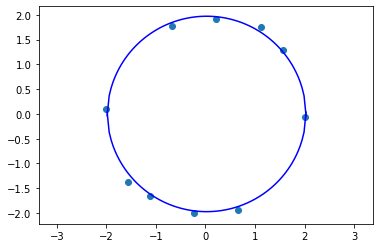

In [47]:
plt.scatter(x = A[:, 0], y = A[:, 1]);
x = np.linspace(start = a - np.sqrt(r2), stop = a + np.sqrt(r2), num = 100)
y = np.sqrt(r2 - (x - a) ** 2) + b
plt.plot(x, y, color = 'b')
plt.plot(x, -y, color = 'b')
plt.axis('equal');

**3**. 20 points

The figure below shows the current population of Durham, Chapel Hill and Raleigh. Arrows show fractions that move between cities each year.

- What are the population sizes of the 3 cities after 3 years have passed? (5 points)
- Find the steady state population of the 3 cities by solving a linear system. (15 points)

Assume no births, deaths or any other fluxes other than those shown.

![img](Q3.png)

- Find the steady state population of the 3 cities by solving a linear system. (15 points)

Note

- You are asked for the steady state *population*
- A check for both cases is that total population does not change

**4**. 20 points

Consider the following matrix

```
A = np.array([
    [5,2],
    [2,5]
])
```

- Find the characteristic polynomial of the matrix `A` (5 points)
- Find the eigenvalues using the companion matrix method `C` (5 points)
- Find a matrix `P` such that $A = P C P^{-1}$ (10 points)

**5**. 20 points

The file `Q5.npy` contains the x and y coordinates in cols 1 and 2 respectively. 

- Find a cubic polynomial model to fit the data using the normal equations (5 points)
- Now solve using mini-batch gradient descent Use a learning rate of 0.0001. Start with a guess of a=1, b=1, c=1, d=1 for the model $ax^3 + bx^2 + cx + d$, and report $(a, b, c, d)$ after 1,000 epochs with a batch size of 5. (15 points)

For simplicity, you don't need to randomize the order when choosing data for each batch.

In [51]:
# Least squares
Q5 = np.load('Q5.npy')
x = Q5[:, 0]
A = np.c_[x ** 0, x ** 1, x ** 2, x ** 3]
y = Q5[:, 1]
la.lstsq(A, y)[0]

array([-1.99235962, -1.02188927, -0.54438689,  0.99809019])

In [54]:
# Normal equations
np.linalg.solve(A.T @ A, A.T @ y)

array([-1.99235962, -1.02188927, -0.54438689,  0.99809019])